In [326]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

In [327]:
x0 = 1
y0 = 3
# define the dimensions
x, y = sp.symbols('x y')
# define the function
f = 1/2*(20-x*y)**2+(x-y)**2
# functionalize the function
f_func = lambdify((x, y),f, modules=['numpy'])

# define the derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
# functionalize the partial derivatives
df_dx_func = lambdify((x, y),df_dx, modules=['numpy'])
df_dy_func = lambdify((x, y),df_dy, modules=['numpy'])
# define the starting point
x0, y0 = 1, 3

In [328]:
f_func(x0, y0), df_dx_func(x0, y0), df_dy_func(x0, y0)

(148.5, -55.0, -13.0)

In [329]:
# functionalize partial derivatives with respect to a dimension while
# another dimension is fixed

# partial derivative of f with respect to x when y is fixed
df_dx_y_func = lambdify(y,df_dx)
# partial derivative of f with respect to y when x is fixed
df_dy_x_func = lambdify(x,df_dy)

In [330]:
# perform 1st coordinate descent step
x1 = sp.solve(df_dx_y_func(y0), x)[0]
y1 = sp.solve(df_dy_x_func(x1), y)[0]
x1, y1, f_func(x1, y1)

(6.00000000000000, 3.47368421052632, 6.73684210526316)

In [331]:
# perform 2nd coordinate descent step
x2 = sp.solve(df_dx_y_func(y1), x)[0]
y2 = sp.solve(df_dy_x_func(x2), y)[0]
x2, y2, f_func(x2, y2)

(5.43284757778654, 3.79246353592084, 2.87319311877684)

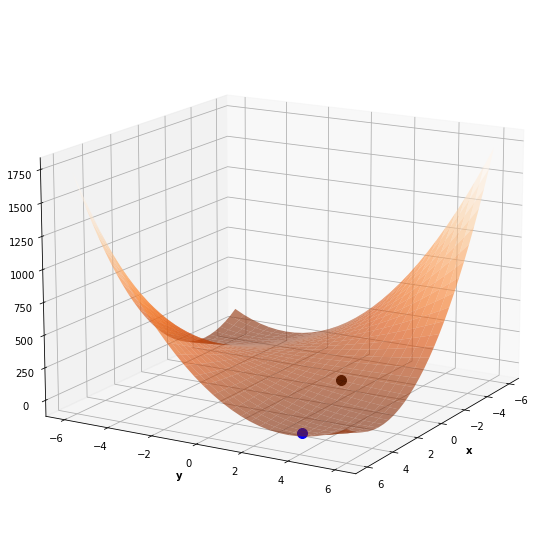

In [332]:
# NOTE: visuaize the plot
x_points = np.linspace(-6, 6, 30)
y_points = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x_points, y_points)
Z = f_func(X, Y)

# set the figure size
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
# plot the surface of the function
# set cmap to define plot color
# set alpha to define opaquenesss
ax.plot_surface(X, Y, Z, cmap='Oranges_r', alpha=0.6)
# set labels
ax.set_xlabel('x', weight='bold')
ax.set_ylabel('y', weight='bold')
# set angles
elev=15         # set the vertical angle
azim=30         # set the horizontal angle
ax.view_init(elev, azim)    # define view
ax.view_init(elev, azim)
ax.scatter(*[x0, y0], f_func(x0, y0), color='black', s=100, alpha=1)    # starting position
ax.scatter(*[x2, y2], f_func(x2, y2), color='b', s=100, alpha=1)        # converged position

In [333]:
# define the dimensions
x, y = sp.symbols('x y')

# define the function
f = x**4 + 4*x*y + 2*y  + (1/2)*y**2
# functionalize the function
f_func = lambdify((x, y), f)

# define the derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# functionalize the partial derivatives
df_dx_func = lambdify((x, y), df_dx)
df_dy_func = lambdify((x, y), df_dy)


In [334]:
# define gradient 
def gradient(pos):
    gradient = np.array([0 for _ in pos])
    gradient[0] = df_dx_func(pos[0], pos[1])
    gradient[1] = df_dy_func(pos[0], pos[1])
    return gradient

# define gradient descend
def gradient_descent(cur_pos, eta=0.05, max_iter=5):
    for _ in range(max_iter):
        cur_pos = cur_pos - eta*gradient(cur_pos)
    return cur_pos, f_func(cur_pos[0], cur_pos[1])

In [335]:
# perform gradient descend
record = gradient_descent([1, 1], eta=0.01, max_iter=100)
# get new position
pos = record[0]
record, gradient(pos)

((array([ 1.34, -2.75]), -13.234570640000012), array([-1,  4]))

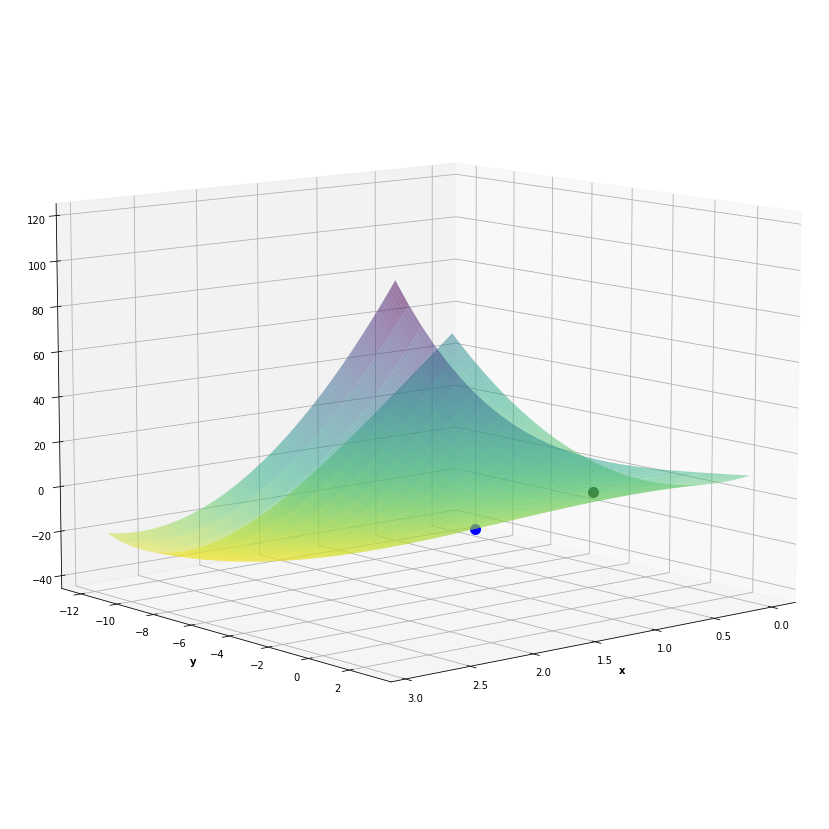

In [336]:
# viualize the plot
x = np.arange(0, 3, 0.1)
y = np.arange(-12, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = f_func(X, Y)

# set the figure size
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
# plot the surface of the function
# set cmap to define plot color
# set alpha to define opaquenesss
ax.plot_surface(X, Y, Z,  cmap='viridis_r', alpha=0.5)
# set labels
ax.set_xlabel('x', weight='bold')
ax.set_ylabel('y', weight='bold')


elev=10         # set the vertical angle
azim=50         # set the horizontal angle
ax.view_init(elev, azim)    # define view

ax.scatter(*[1,1], f_func(1, 1), color='black', s=100, alpha=1)         # starting position
ax.scatter(*pos, f_func(pos[0], pos[1]), color='b', s=100, alpha=1)     # converged position

In [337]:
# set the data matrix and ground-truths
D=np.array([[1.5,2],[-1,1],[0.5,0.5],[-0.5,-1],[4,2]])      
y=np.array([1,0,2,0.5,3])

In [338]:
# set the basis function
def phi(d):
    return np.array([1, d[0], d[1]])

In [339]:
# set the design matrix
X = [phi(np.array(d).T).T for d in D]
X = np.array(X)
X, X.shape

(array([[ 1. ,  1.5,  2. ],
        [ 1. , -1. ,  1. ],
        [ 1. ,  0.5,  0.5],
        [ 1. , -0.5, -1. ],
        [ 1. ,  4. ,  2. ]]),
 (5, 3))

In [340]:
# compute the beta vector for standard regression
beta = np.linalg.inv((X.T@X))@X.T@y
beta

array([ 0.96282173,  0.65443279, -0.27979028])

In [341]:
# compute the beta vector for ridge regression
beta = np.linalg.inv(X.T@X + 2*np.identity(3))@(X.T@y)
beta

array([0.57752179, 0.52552927, 0.02054795])

In [342]:
#y[0] denotes prediction
#y[1] denotes ground-truth

# partial derivative of the loss w.r.t yHat
def yHatLoss(yHat, yTrue):
    return 2*(yHat - yTrue)

In [343]:
# set ground-truth provided in the exercise
yTrue = 2
# compute the prediction
yHat = max(0, 3)*0.5 + max(0, -3)*2 
# compute the derivative of th loss
dyHatL = yHatLoss(yHat, yTrue)
dyHatL

-1.0

In [344]:
# define the partial derivative of the activation function w.r.t. the activation
def daReLu(a):
    return 1 if a > 0 else 0

In [345]:
# derivative of Loss w.r.t the first activation
da1L = dyHatL*0.5*daReLu(3)
da1L

-0.5

In [346]:
# derivative of Loss w.r.t the second activation
da2L = dyHatL*2*daReLu(0)
da2L

-0.0

In [347]:
# set the feature maps
h1 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
]
)
h2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0]
]
)
h3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]
]
)
# set the kernels
k1 = np.array([
    [0, 0.5, 1],
    [-0.5, 0, 0.5],
    [-1, -0.5, 0]
]
) 
k2 = np.array([
    [0, -0.5, 0],
    [-0.5, 2, -0.5],
    [0, -0.5, 0]
]
)
k3 = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 0, 0]
]
)

In [348]:
# define the convolution operation
def convolution(h, k):
    map = [ [np.sum(h[i:i+3, j:j+3]*k) for j in range(4)]  for i in range(4)]
    map = np.array(map)
    # return the newly computed feature map
    return map

In [349]:
# compute feature maps after the convolutional layer
map1, map2, map3 = convolution(h1, k1), convolution(h2, k2), convolution(h3, k3)

In [350]:
# see the 1st feature map yielded by the 1st kernel
map1

array([[ 0., -1., -1., -1.],
       [ 1.,  0., -1., -1.],
       [ 1.,  1.,  0., -1.],
       [ 1.,  1.,  1.,  0.]])

In [351]:
# see the 2nd feature map yielded by the 2nd kernel
map2

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

In [352]:
# see the 3rd feature map yielded by the 3rd kernel
map3

array([[ 0,  0, -1, -1],
       [ 0,  0,  0, -1],
       [-1,  0,  0,  0],
       [-1, -1,  0,  0]])

In [353]:
# set the bias matrix
# per neuron one bias
b = np.full((4, 4), -2)
# compute the new RGB feature map (containing the biases as well)
a = map1 + map2 + map3 + b
a

array([[ 0., -4., -4., -4.],
       [-2.,  0., -4., -4.],
       [-2., -2.,  0., -4.],
       [-2., -2., -2.,  0.]])

In [354]:
# compute the trace of the matrix
np.trace(a)

0.0

In [355]:
# set the data matrix
D = np.array([[1, 2, 0],[0, 2, 1],[8,2,2]])
# set the rank of the matrix factorization
rank = 2
# compute the mean per feature
muF = D.mean(axis=0)
# per feature sample, subtract the mean so that data distribution is
# centralized
C = D - np.outer(np.ones(3), muF)
# observe the new feature means
C.mean(axis=0)

array([0., 0., 0.])

In [356]:
# perform SVD
# WARNING: np.linalg.svd returns V.T, not V
U, S, Vt = np.linalg.svd(C)
Vt

array([[ 9.82854178e-01,  0.00000000e+00,  1.84384555e-01],
       [ 1.84384555e-01,  0.00000000e+00, -9.82854178e-01],
       [-0.00000000e+00,  1.00000000e+00, -2.22044605e-16]])

In [357]:
# transpose Vt to get PCs as column vectors
# get the 1st PC
pc1 = Vt.T[:,0]
# get the 2nd PC
pc2 = Vt.T[:,1]
pc1, pc2

(array([0.98285418, 0.        , 0.18438456]),
 array([ 0.18438456,  0.        , -0.98285418]))

In [358]:
# get the 1st observation
D1 = D[0]
D1

array([1, 2, 0])

In [359]:
# project the 1st observation onto PC1
D1@pc1

0.9828541782841685

In [360]:
# project the 1st observation onto PC2
D1@pc2

0.18438455528962291

In [361]:
# compute the Λ matrix
# NOTE: covariance matrix is:  R = C@C.T, 
# R = (USV.T)@(USV.T).T = U@S@V.T@V@S@U.T = U@S@S.T@U.T, NOTE: V.T@V = I
# Λ = S@S.T
Λ = np.diag(S) @ np.diag(S).T
# diagnonals of Λ have the variances pecentually
Λ

array([[3.93132079e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.86792084e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.23901003e-34]])

In [362]:
# compute the variance convered by PC1, PC2
((Λ[0][0] + Λ[1][1]) / (Λ[0][0] + Λ[1][1] + Λ[2][2]))*100

100.0

In [395]:
# set the data matrix
D = np.array([[1, 3, 1],[1, 2, 2],[-1, 3, 1],[5, 2, 3],[3, 2, 4]])
D

array([[ 1,  3,  1],
       [ 1,  2,  2],
       [-1,  3,  1],
       [ 5,  2,  3],
       [ 3,  2,  4]])

In [435]:
# define kmeans algorithm
def kmeans(X):
    # NOTE: update cluster assignments 
    # initialize the cluster assignments matrix
    Y = np.array([ [0, 0] for i in range(5)])
    # per observation
    for i in range(len(D)):
        # intiialize the list in which distances to centroids are to be stored
        dist = []
        # per centroid
        for j in range(2):
            # compute the euclidean distance to that centroid
            distance = np.linalg.norm(D[i] - X[:, j], 2)
            # record the distance
            dist.append(distance)
        # find the minimum distance
        minDist = min(dist)
        # identify the closest centroid
        assigned = dist.index(minDist)
        # assign the observation to the centroid
        Y[i][assigned] = 1

    # NOTE: update centroid positions
    # per centroid 
    for i in range(Y.shape[1]):
        # retrieve observation assignments for this centroid
        belongings = Y[:, i]
        # identify the observations 
        pos = np.where(belongings == 1)[0]
        # initialize the updated centroid
        centroid = [0 for i in range(X.shape[0])]
        # compute the arithmetic mean centroid 
        for p in pos:
            centroid += D[p]
        centroid = centroid / len(pos)
        # update thee centroid in the centroids matrix
        X[:, i] = centroid

    # return new cluster centroids, cluster assignments, and L2 norm loss
    return X, Y, np.linalg.norm(D - Y@X.T, ord='fro')**2

In [436]:
# define kmeans plot
def kmeans_plot(D, X, Y, no):
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('x', weight='bold')
    ax.set_ylabel('y', weight='bold')
    ax.set_title(f'{no}', weight='bold', fontsize=50, y=0.9)

    # set the angles
    elev=10         # set the vertical angle
    azim=20         # set the horizontal angle
    ax.view_init(elev, azim)    # define view

    # define colors
    color = ['r', 'b']
    # per observation
    for i in range(len(D)):
        # add it to 3d space
        ax.scatter(D[i][0], D[i][1], D[i][2], color= color[np.where(Y[i] == 1)[0][0]], s=100)

    # per centroid
    for j in range(X.shape[1]):
        # add it to 3d space
        ax.scatter(X[0][j], X[1][j], X[2][j], color=color[j], marker='D', s=100)

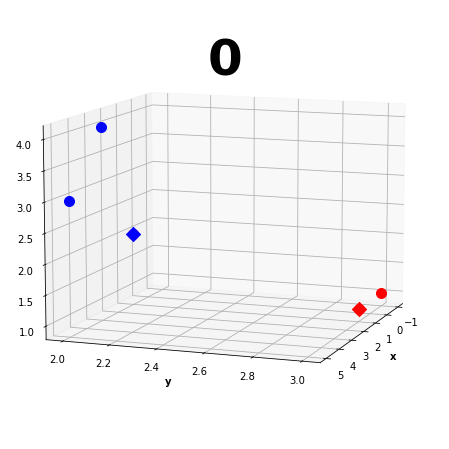

In [437]:
# set the centroids
X = np.array([D[0], D[1]]).T
kmeans_plot(D, X, Y, 0)

(array([[0, 3],
        [3, 2],
        [1, 3]]),
 array([[1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1]]),
 11.999999999999998)

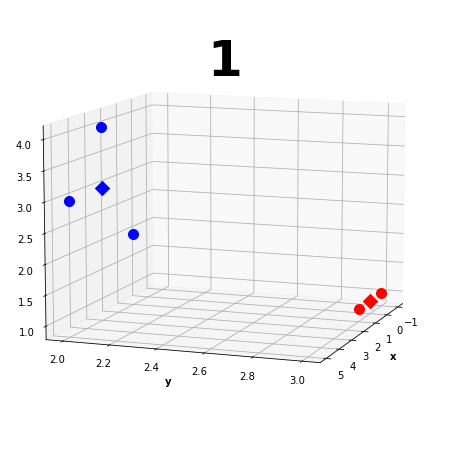

In [438]:
# perform 1st kmeans step
X, Y, Loss = kmeans(X)
kmeans_plot(D, X, Y, 1)
X, Y, Loss

(array([[ 1,  3,  1],
        [ 1,  2,  2],
        [-1,  3,  1],
        [ 5,  2,  3],
        [ 3,  2,  4]]),
 array([[0, 4],
        [2, 2],
        [1, 3]]),
 array([[1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1]]),
 9.0)

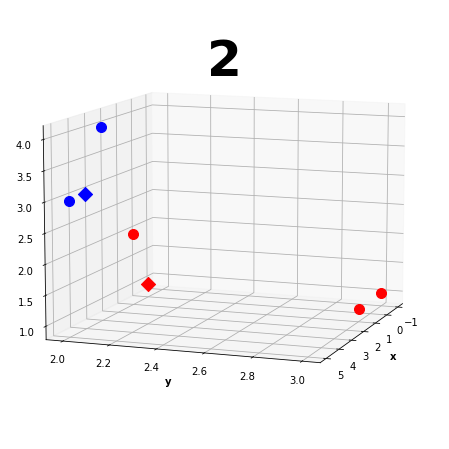

In [440]:
# perform 2nd kmeans step
X, Y, Loss = kmeans(X)
kmeans_plot(D, X, Y, 2)
D, X, Y, Loss